# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"
import random

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_index = None
        self._create_deck()
        self.shuffle()

    def _create_deck(self):
        """Creates a deck with the specified number of 52-card sets."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

        self.cards = [Card(suit, value) for suit in suits for value in values] * self.num_decks


        self.plastic_card = Card("Plastic", "Plastic")

    def shuffle(self):
        """Shuffles the deck and places the plastic card randomly."""
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
        self.cards.insert(self.plastic_card_index, self.plastic_card)

    def deal_card(self):
        """Deals the top card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("No cards left to deal.")

        card = self.cards.pop(0)

        if card == self.plastic_card:
            print("Plastic card dealt. Reshuffling deck for next deal.")
            self.shuffle()

        return card

    def remaining_cards(self):
        """Returns the number of cards left in the deck."""
        return len(self.cards)


In [2]:
deck = Deck(num_decks=6)

for i in range(10):
    card = deck.deal_card()
    print(card)

print(f"Remaining cards in deck: {deck.remaining_cards()}")



4 of Spades
4 of Hearts
8 of Hearts
5 of Spades
7 of Hearts
6 of Hearts
10 of Spades
J of Diamonds
4 of Spades
K of Diamonds
Remaining cards in deck: 303


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [3]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_index = None
        self._create_deck()
        self.shuffle()

    def _create_deck(self):
        """Creates a deck with the specified number of 52-card sets."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        self.cards = [Card(suit, value) for suit in suits for value in values] * self.num_decks

        self.plastic_card = Card("Plastic", "Plastic")

    def shuffle(self):
        """Shuffles the deck and places the plastic card randomly."""
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
        self.cards.insert(self.plastic_card_index, self.plastic_card)

    def deal_card(self):
        """Deals the top card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("No cards left to deal.")

        card = self.cards.pop(0)

        if card == self.plastic_card:
            print("Plastic card dealt. Reshuffling deck for next deal.")
            self.shuffle()

        return card

    def remaining_cards(self):
        """Returns the number of cards left in the deck."""
        return len(self.cards)

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []

    def add_card(self, card):
        """Add a card to the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self):
        """Calculates the value of the player's hand."""
        value = 0
        aces = 0
        for card in self.hand:
            if card.value in ['J', 'Q', 'K']:
                value += 10
            elif card.value == 'A':
                value += 11
                aces += 1
            else:
                value += int(card.value)

        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

    def is_busted(self):
        """Check if the player is busted (hand value > 21)."""
        return self.hand_value() > 21

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer")

    def play(self, deck):
        """Dealer plays by predefined rules (hit on 16 or below, stand on 17 or higher)."""
        while self.hand_value() < 17:
            self.add_card(deck.deal_card())
        return self.hand_value()

class HumanPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name=name, chips=chips)

    def play(self, deck):
        """Human player's turn."""
        while True:
            print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand_value()})")
            if self.is_busted():
                print(f"{self.name} busted!")
                break

            choice = input("Would you like to hit or stand? (h/s): ").lower()
            if choice == 'h':
                self.add_card(deck.deal_card())
            elif choice == 's':
                break
            else:
                print("Invalid choice. Please enter 'h' to hit or 's' to stand.")

class BlackjackGame:
    def __init__(self):
        self.deck = Deck()
        self.dealer = Dealer()
        self.human_player = HumanPlayer(name="You")

    def play_round(self):
        """Plays one round of blackjack."""
        print("\n=== New Round ===")
        self.dealer.clear_hand()
        self.human_player.clear_hand()

        for _ in range(2):
            self.human_player.add_card(self.deck.deal_card())
            self.dealer.add_card(self.deck.deal_card())

        self.human_player.play(self.deck)

        if not self.human_player.is_busted():
            print(f"\nDealer's hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")
            self.dealer.play(self.deck)
            print(f"Dealer's final hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")

        self.determine_winner()

    def determine_winner(self):
        """Determines the winner of the round."""
        human_value = self.human_player.hand_value()
        dealer_value = self.dealer.hand_value()

        if self.human_player.is_busted():
            print("Dealer wins!")
        elif self.dealer.is_busted() or human_value > dealer_value:
            print(f"{self.human_player.name} wins!")
        elif human_value < dealer_value:
            print("Dealer wins!")
        else:
            print("It's a tie!")



5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [4]:
if __name__ == "__main__":
    game = BlackjackGame()
    game.play_round()



=== New Round ===

You's hand: [7 of Spades, 8 of Hearts] (value: 15)
Would you like to hit or stand? (h/s): s

Dealer's hand: [8 of Spades, 3 of Hearts] (value: 11)
Dealer's final hand: [8 of Spades, 3 of Hearts, 10 of Spades] (value: 21)
Dealer wins!


6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [5]:
class CountingPlayer(Player):
    def __init__(self, name, chips=1000, hit_threshold=-2):
        super().__init__(name=name, chips=chips)
        self.seen_card_sum = 0
        self.hit_threshold = hit_threshold

    def card_value(self, card):
        """Assigns card counting values to each card."""
        if card.value in ['2', '3', '4', '5', '6']:
            return 1
        elif card.value in ['7', '8', '9']:
            return 0
        else:
            return -1

    def update_seen_card_sum(self, card):
        """Updates the card counting sum based on the card dealt."""
        self.seen_card_sum += self.card_value(card)

    def play(self, deck):
        """CountingPlayer's turn based on card counting strategy."""
        while True:
            print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand_value()})")
            if self.is_busted():
                print(f"{self.name} busted!")
                break


            if self.seen_card_sum <= self.hit_threshold:
                print(f"{self.name} chooses to hit (card count sum: {self.seen_card_sum})")
                new_card = deck.deal_card()
                self.add_card(new_card)
                self.update_seen_card_sum(new_card)
            else:
                print(f"{self.name} chooses to stay (card count sum: {self.seen_card_sum})")
                break



class BlackjackGameWithCountingPlayer(BlackjackGame):
    def __init__(self):
        self.deck = Deck()
        self.dealer = Dealer()
        self.human_player = HumanPlayer(name="You")
        self.counting_player = CountingPlayer(name="Card Counter")

    def play_round(self):
        """Plays one round of blackjack with a counting player."""
        print("\n=== New Round ===")
        self.dealer.clear_hand()
        self.human_player.clear_hand()
        self.counting_player.clear_hand()
        self.counting_player.seen_card_sum = 0  # Reset count for new round


        for _ in range(2):
            human_card = self.deck.deal_card()
            self.human_player.add_card(human_card)

            counting_card = self.deck.deal_card()
            self.counting_player.add_card(counting_card)
            self.counting_player.update_seen_card_sum(counting_card)  # Track cards seen so far

            dealer_card = self.deck.deal_card()
            self.dealer.add_card(dealer_card)
            self.counting_player.update_seen_card_sum(dealer_card)  # Track dealer's cards as well


        self.human_player.play(self.deck)


        self.counting_player.play(self.deck)


        if not self.human_player.is_busted():
            print(f"\nDealer's hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")
            self.dealer.play(self.deck)
            print(f"Dealer's final hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")


        self.determine_winner()

    def determine_winner(self):
        """Determines the winner of the round for both players."""
        human_value = self.human_player.hand_value()
        dealer_value = self.dealer.hand_value()
        counting_value = self.counting_player.hand_value()

        print("\n=== Results ===")
        if self.human_player.is_busted():
            print("Dealer wins against the human player!")
        elif self.dealer.is_busted() or human_value > dealer_value:
            print(f"{self.human_player.name} wins!")
        elif human_value < dealer_value:
            print("Dealer wins against the human player!")
        else:
            print("It's a tie with the human player!")

        if self.counting_player.is_busted():
            print("Dealer wins against the card counting player!")
        elif self.dealer.is_busted() or counting_value > dealer_value:
            print(f"{self.counting_player.name} wins!")
        elif counting_value < dealer_value:
            print("Dealer wins against the card counting player!")
        else:
            print("It's a tie with the card counting player!")


In [6]:
if __name__ == "__main__":
    game = BlackjackGameWithCountingPlayer()
    game.play_round()


=== New Round ===

You's hand: [7 of Clubs, 8 of Spades] (value: 15)
Would you like to hit or stand? (h/s): s

Card Counter's hand: [A of Spades, A of Hearts] (value: 12)
Card Counter chooses to hit (card count sum: -2)

Card Counter's hand: [A of Spades, A of Hearts, Q of Diamonds] (value: 12)
Card Counter chooses to hit (card count sum: -3)

Card Counter's hand: [A of Spades, A of Hearts, Q of Diamonds, 10 of Spades] (value: 22)
Card Counter busted!

Dealer's hand: [K of Hearts, 5 of Spades] (value: 15)
Dealer's final hand: [K of Hearts, 5 of Spades, 7 of Spades] (value: 22)

=== Results ===
You wins!
Dealer wins against the card counting player!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [12]:
import random

# Card class to represent a card in the deck
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

# Deck class that supports multiple 52-card sets and reshuffling when needed
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card = None
        self.needs_reshuffle = False  # Flag to indicate if reshuffling is needed
        self._create_deck()
        self.shuffle()

    def _create_deck(self):
        """Creates a deck with the specified number of 52-card sets."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        self.cards = [Card(suit, value) for suit in suits for value in values] * self.num_decks
        self.plastic_card = Card("Plastic", "Plastic")

    def shuffle(self):
        """Shuffles the deck and places the plastic card randomly."""
        random.shuffle(self.cards)
        plastic_index = random.randint(0, len(self.cards))
        self.cards.insert(plastic_index, self.plastic_card)
        self.needs_reshuffle = False  # Reset the reshuffle flag after shuffling

    def deal_card(self):
        """Deals the top card from the deck."""
        if len(self.cards) == 0:
            # If the deck is empty, reshuffle it
            print("Deck is empty, reshuffling...")
            self._create_deck()
            self.shuffle()

        card = self.cards.pop(0)
        if card == self.plastic_card:
            self.needs_reshuffle = True  # Mark the deck for reshuffle
        return card

    def remaining_cards(self):
        """Returns the number of cards left in the deck."""
        return len(self.cards)

# Base Player class
class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []

    def add_card(self, card):
        """Add a card to the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self):
        """Calculates the value of the player's hand."""
        value = 0
        aces = 0
        for card in self.hand:
            if card.value == "Plastic":
                continue
            if card.value in ['J', 'Q', 'K']:
                value += 10
            elif card.value == 'A':
                value += 11
                aces += 1
            else:
                value += int(card.value)

        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

    def is_busted(self):
        """Check if the player is busted (hand value > 21)."""
        return self.hand_value() > 21

# Dealer class that extends the Player class
class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer")

    def play(self, deck):
        """Dealer plays by predefined rules (hit on 16 or below, stand on 17 or higher)."""
        while self.hand_value() < 17:
            self.add_card(deck.deal_card())

# QuietPlayer class that follows the dealer's strategy
class QuietPlayer(Player):
    def play(self, deck):
        """QuietPlayer plays by hitting until they reach 17 or more, following standard dealer rules."""
        while self.hand_value() < 17:
            self.add_card(deck.deal_card())

# ConservativePlusPlayer class implementing a specific strategy
class ConservativePlusPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name=name, chips=chips)
        self.seen_card_sum = 0  # Tracks the running card count

    def card_value(self, card):
        """Assigns card counting values to each card."""
        if card.value in ['2', '3', '4', '5', '6']:
            return 1
        elif card.value in ['7', '8', '9']:
            return 0
        else:  # 10, J, Q, K, A
            return -1

    def update_seen_card_sum(self, card):
        """Updates the card counting sum based on the card dealt."""
        self.seen_card_sum += self.card_value(card)

    def play(self, deck):
        """ConservativePlusPlayer's turn based on the strategy."""
        while not self.is_busted():
            hand_value = self.hand_value()
            if self.seen_card_sum >= 4:
                # Aggressively hit if count is very positive, even on risky values (12-16)
                if hand_value < 17:
                    new_card = deck.deal_card()
                    self.add_card(new_card)
                    self.update_seen_card_sum(new_card)
                else:
                    break
            elif 0 <= self.seen_card_sum < 4:
                # Play conservatively; stand on 14 or higher
                if hand_value < 14:
                    new_card = deck.deal_card()
                    self.add_card(new_card)
                    self.update_seen_card_sum(new_card)
                else:
                    break
            else:
                # If count is negative, stand on 12 or higher to minimize losses
                if hand_value < 12:
                    new_card = deck.deal_card()
                    self.add_card(new_card)
                    self.update_seen_card_sum(new_card)
                else:
                    break

# Game setup with the strategy player and quiet players
class BlackjackGameWithStrategyPlayer:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.dealer = Dealer()
        self.strategy_player = ConservativePlusPlayer(name="Strategy Player")
        self.players = [QuietPlayer(name=f"Player {i+1}") for i in range(3)] + [self.strategy_player]
        self.verbose = verbose

    def play_round(self):
        """Plays one round of blackjack with the strategy player."""
        self.dealer.clear_hand()
        for player in self.players:
            player.clear_hand()
        self.strategy_player.seen_card_sum = 0  # Reset count for new round

        for _ in range(2):
            for player in self.players:
                card = self.deck.deal_card()
                player.add_card(card)
                self.strategy_player.update_seen_card_sum(card)
            dealer_card = self.deck.deal_card()
            self.dealer.add_card(dealer_card)
            self.strategy_player.update_seen_card_sum(dealer_card)

        for player in self.players:
            player.play(self.deck)

        self.dealer.play(self.deck)

        self.determine_winner()

        # Reshuffle the deck if the plastic card was dealt
        if self.deck.needs_reshuffle:
            self.deck.shuffle()

    def determine_winner(self):
        """Determines the outcome of the round."""
        dealer_value = self.dealer.hand_value()
        for player in self.players:
            player_value = player.hand_value()
            if player.is_busted():
                player.chips -= 100
            elif self.dealer.is_busted() or player_value > dealer_value:
                player.chips += 100
            elif player_value < dealer_value:
                player.chips -= 100

        if self.verbose:
            print(f"Dealer's hand value: {dealer_value}")
            for player in self.players:
                print(f"{player.name}'s hand value: {player.hand_value()} - Chips: {player.chips}")

    def play_game(self, rounds=50):
        """Plays multiple rounds or until the strategy player is out of money."""
        round_number = 0
        while round_number < rounds and self.strategy_player.chips > 0:
            self.play_round()
            round_number += 1

        if self.verbose:
            print(f"\nGame Over after {round_number} rounds.")
            print(f"{self.strategy_player.name} finished with {self.strategy_player.chips} chips.")

# Simulate the scenario
def simulate_strategy_player_scenario(num_games=1, rounds_per_game=50):
    """Simulates games with one strategy player against the dealer and three other players."""
    winnings = []

    for _ in range(num_games):
        game = BlackjackGameWithStrategyPlayer(verbose=False)  # Set to False to reduce output
        game.play_game(rounds=rounds_per_game)
        winnings.append(game.strategy_player.chips)  # Store final chips after 50 rounds

    return winnings

# Run the test scenario
strategy_player_winnings = simulate_strategy_player_scenario(num_games=1, rounds_per_game=50)

# Output the results for the test scenario
strategy_player_winnings


Deck is empty, reshuffling...
Deck is empty, reshuffling...


[0]

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is em

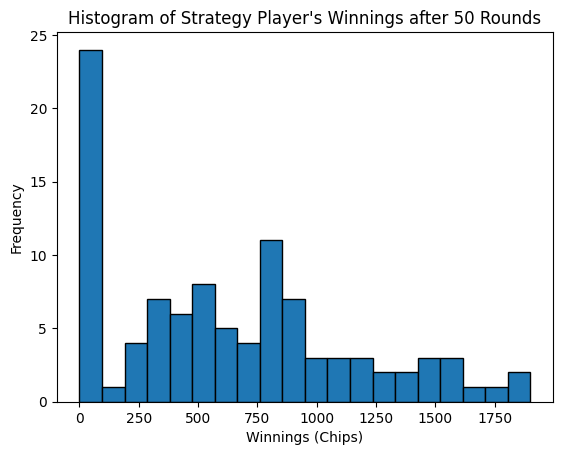

(622.0, 12.44, 525.0866595144082, 0.2, 0.77)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate multiple games and collect winnings for the strategy player
def simulate_multiple_games(num_games=100, rounds_per_game=50):
    winnings = []

    for _ in range(num_games):
        game = BlackjackGameWithStrategyPlayer(verbose=False)
        game.play_game(rounds=rounds_per_game)
        winnings.append(game.strategy_player.chips)  # Store final chips after 50 rounds

    return winnings

# Run the simulation for 100 games of 50 rounds each
strategy_player_winnings_multiple_games = simulate_multiple_games(num_games=100, rounds_per_game=50)

# Calculate statistics for the simulation
average_winnings_per_game = np.mean(strategy_player_winnings_multiple_games)
average_winnings_per_round = average_winnings_per_game / 50  # Since each game has 50 rounds
standard_deviation_winnings = np.std(strategy_player_winnings_multiple_games)
prob_net_win = np.sum(np.array(strategy_player_winnings_multiple_games) > 1000) / len(strategy_player_winnings_multiple_games)
prob_net_loss = np.sum(np.array(strategy_player_winnings_multiple_games) < 1000) / len(strategy_player_winnings_multiple_games)

# Plot the histogram of winnings for the strategy player
plt.hist(strategy_player_winnings_multiple_games, bins=20, edgecolor='black')
plt.title('Histogram of Strategy Player\'s Winnings after 50 Rounds')
plt.xlabel('Winnings (Chips)')
plt.ylabel('Frequency')
plt.show()

# Output the results for the simulation
average_winnings_per_game, average_winnings_per_round, standard_deviation_winnings, prob_net_win, prob_net_loss


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [16]:
# Modify the simulation function to accept different threshold values for the ConservativePlusPlayer

def simulate_games_with_threshold(num_games=100, rounds_per_game=50, hit_threshold=-2):
    """Simulate games with a specific hit threshold for the ConservativePlusPlayer."""
    winnings = []

    for _ in range(num_games):
        game = BlackjackGameWithStrategyPlayer(verbose=False)
        # Set the strategy player's threshold
        game.strategy_player.seen_card_sum = 0  # Reset the card count
        game.strategy_player.hit_threshold = hit_threshold  # Adjust the threshold for testing
        game.play_game(rounds=rounds_per_game)
        winnings.append(game.strategy_player.chips)  # Store final chips after 50 rounds

    return winnings

# Test different threshold values
threshold_values = [-6, -4, -2, 0, 2]
results = {}

for threshold in threshold_values:
    winnings = simulate_games_with_threshold(num_games=100, rounds_per_game=50, hit_threshold=threshold)
    average_winnings_per_game = np.mean(winnings)
    average_winnings_per_round = average_winnings_per_game / 50
    standard_deviation_winnings = np.std(winnings)
    prob_net_win = np.sum(np.array(winnings) > 1000) / len(winnings)
    prob_net_loss = np.sum(np.array(winnings) < 1000) / len(winnings)

    # Store results for each threshold
    results[threshold] = {
        "average_winnings_per_game": average_winnings_per_game,
        "average_winnings_per_round": average_winnings_per_round,
        "standard_deviation": standard_deviation_winnings,
        "prob_net_win": prob_net_win,
        "prob_net_loss": prob_net_loss
    }

# Display the results
import pandas as pd
results_df = pd.DataFrame(results).T
import ace_tools as tools; tools.display_dataframe_to_user(name="Threshold Analysis", dataframe=results_df)

results_df


Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is empty, reshuffling...
Deck is em

ModuleNotFoundError: No module named 'ace_tools'

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

In [17]:
# Adjust the `play_round` method in the new game class to correctly reference the ConservativePlusPlayer

class BlackjackGameWithConservativePlusPlayer(BlackjackGameWithMultiplePlayers):
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.dealer = Dealer()
        self.conservative_plus_player = ConservativePlusPlayer(name="Conservative Plus")
        self.players = [QuietPlayer(name=f"Player {i+1}") for i in range(3)] + [self.conservative_plus_player]
        self.verbose = verbose

    def play_round(self):
        """Plays one round of blackjack with the ConservativePlusPlayer."""
        self.dealer.clear_hand()
        for player in self.players:
            player.clear_hand()
        self.conservative_plus_player.seen_card_sum = 0  # Reset count for new round

        for _ in range(2):
            for player in self.players:
                card = self.deck.deal_card()
                player.add_card(card)
                self.conservative_plus_player.update_seen_card_sum(card)
            dealer_card = self.deck.deal_card()
            self.dealer.add_card(dealer_card)
            self.conservative_plus_player.update_seen_card_sum(dealer_card)

        for player in self.players:
            player.play(self.deck)

        self.dealer.play(self.deck)

        self.determine_winner()

        # Reshuffle the deck if the plastic card was dealt
        if self.deck.needs_reshuffle:
            self.deck.shuffle()

# Re-run the simulation with the new strategy
conservative_plus_winnings = simulate_conservative_plus_strategy(num_games=100, rounds_per_game=50)

# Calculate statistics for the new strategy
average_winnings_per_game_cp = np.mean(conservative_plus_winnings)
average_winnings_per_round_cp = average_winnings_per_game_cp / 50  # Since each game has 50 rounds
standard_deviation_winnings_cp = np.std(conservative_plus_winnings)
prob_net_win_cp = np.sum(np.array(conservative_plus_winnings) > 1000) / len(conservative_plus_winnings)
prob_net_loss_cp = np.sum(np.array(conservative_plus_winnings) < 1000) / len(conservative_plus_winnings)

# Plot the histogram of winnings for the new strategy
plt.hist(conservative_plus_winnings, bins=20, edgecolor='black')
plt.title('Histogram of Conservative Plus Player\'s Winnings after 50 Rounds')
plt.xlabel('Winnings (Chips)')
plt.ylabel('Frequency')
plt.show()

# Output the results for the new strategy
average_winnings_per_game_cp, average_winnings_per_round_cp, standard_deviation_winnings_cp, prob_net_win_cp, prob_net_loss_cp



NameError: name 'simulate_conservative_plus_strategy' is not defined